# Problem Set 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

This problem set uses data on insuree characteristics and medical costs. This is a public domain dataset downloaded from [kaggle](https://www.kaggle.com/mirichoi0218/insurance). 

The variables in the data are:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index of primary beneficiary
- children: Number of children covered by health insurance / Number of dependents
- smoker: whether primary beneficiary smokes
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: medical costs billed by health insurance

You will build a  model to predict charges given the other variables in the data. 


In [2]:
insure = pd.read_csv("https://raw.githubusercontent.com/doctor-phil/ECON323_2024_Spring/main/problem_sets/insurance.csv")
insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Questions 1-3

These question are intentionally open-ended. For each one, carefully choose the type of visualization you’ll create. Put some effort into choosing colors, labels, and other formatting.

### Question 1

Create a visualization showing the relationship between smoking and medical costs. 

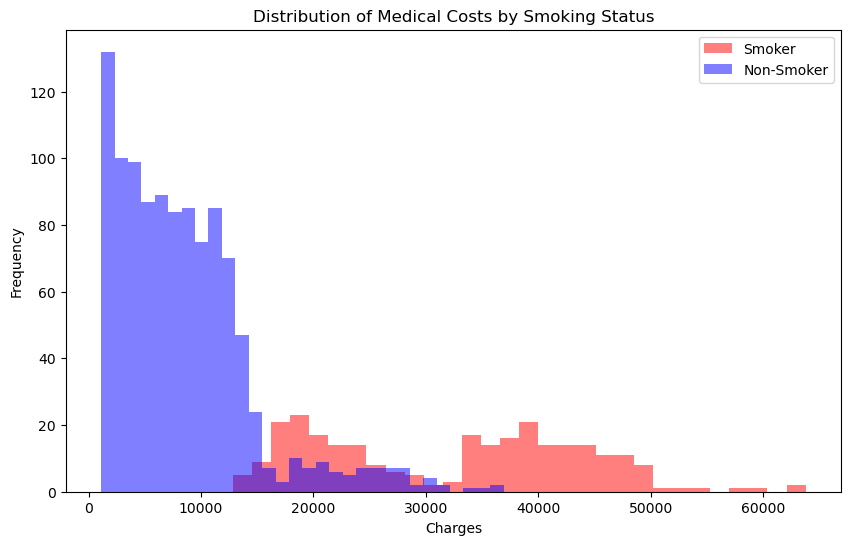

In [3]:
# your code here

plt.figure(figsize=(10, 6))
plt.hist(insure[insure['smoker'] == 'yes']['charges'], bins=30, alpha=0.5, color='red', label='Smoker')
plt.hist(insure[insure['smoker'] == 'no']['charges'], bins=30, alpha=0.5, color='blue', label='Non-Smoker')
plt.title('Distribution of Medical Costs by Smoking Status')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Question 2

Create a visualization showing the relationship between BMI and medical costs. 

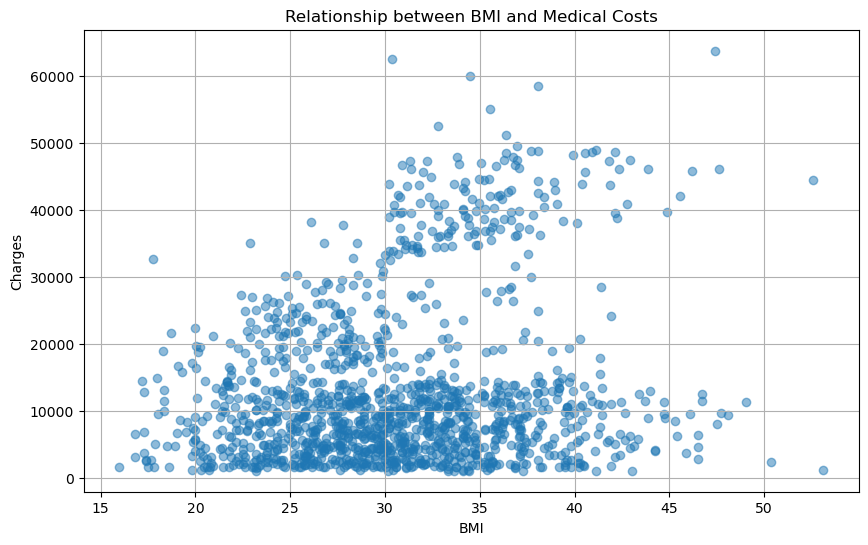

In [4]:
# your code here

plt.figure(figsize=(10, 6))
plt.scatter(insure['bmi'], insure['charges'], alpha=0.5)
plt.title('Relationship between BMI and Medical Costs')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

### Question 3

Does the relationship between medical costs and BMI vary with gender? Create a visualization to answer this question.

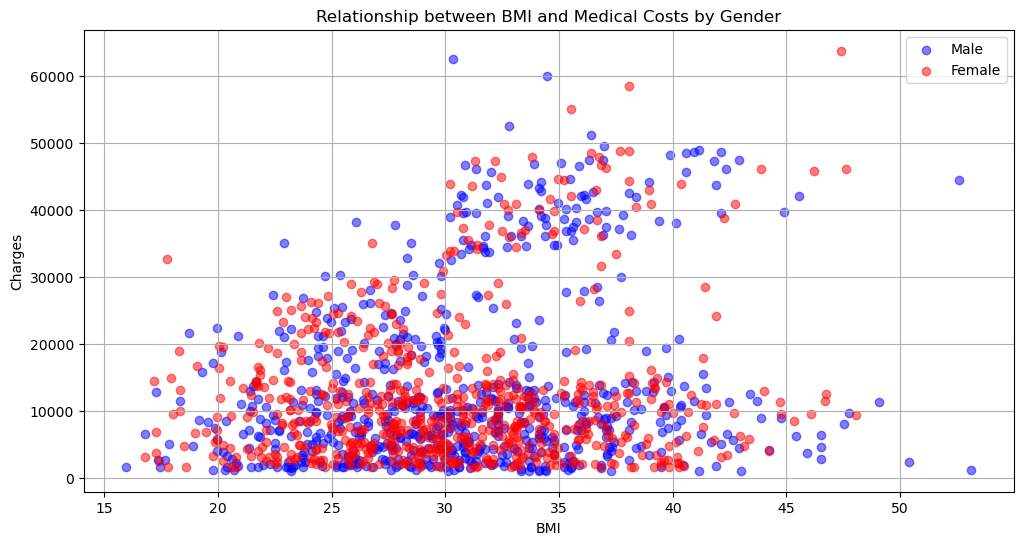

In [5]:
# your code here
male_data = insure[insure['sex'] == 'male']
female_data = insure[insure['sex'] == 'female']

plt.figure(figsize=(12, 6))
plt.scatter(male_data['bmi'], male_data['charges'], alpha=0.5, color='blue', label='Male')
plt.scatter(female_data['bmi'], female_data['charges'], alpha=0.5, color='red', label='Female')
plt.title('Relationship between BMI and Medical Costs by Gender')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()


The disparities in cost depending on bmi do not seem to vary with gender. It appears that for both genders, it can be inferred that if your bmi is above average, you can expect to pay above average health insurance.

## Questions 4-5

Suppose that you own a mobile app that has a "freemium" pricing policy, and you want to model how the behavior of your users depends on the monthly subscription price that you charge.

The population of your potential app users are distributed between three states; Non-users, Free users, and Premium users. **All users begin as Non-users**; a Non-user will never go directly from being a Non-user to being a Premium user, without first trying the app out as a Free user for at least one month. In each month, 5\% of the Non-users will decide to try the app in the next month.

In every time period, 0.5\% of the Free users tend to leave the app and become Non-users again. After those users switch, some of the remaining users will choose to subscribe to the app in a given month (and transfer from the Free user category to the Premium user category). The probability that a Free user who did not already leave the app chooses to subscribe for the next month depends on the monthly price that you charge. If the monthly price is represented by a positive number $p$, then the probability of subscribing is given by $$\mathbb{P}\left[ \text{Free user chooses to subscribe to Premium}\right] = \frac{1-\mathbb{P}[\text{Free user chooses to leave the app}]}{(1+p)^2}.$$

Finally, every month 5\% of Premium users will cancel their subscriptions, and 1\%  of Premium users will delete the app and become Non-users again.


### Question 4

Define a function `transition_matrix` over prices $p$, whose output is a row-stochastic version of the matrix that describes the transition probabilities in this economy.

Write another function called `iterate` that takes as arguments $p$ and $t$, where $t$ is the number of months and takes a default value of 6 months, and outputs the distribution of users into categories after $t$ months.

In [9]:
# your code here
import numpy as np

def transition_matrix(prices):
    
    num_states = 3
    transition_matrix = np.zeros((num_states, num_states))

    p_leave = 0.005
    p_cancel = 0.05
    p_delete = 0.01
    
    for price in prices:
        
        transition_matrix[0, 0] = 0.95
        
        transition_matrix[0, 1] = 0.05
        
        transition_matrix[1, 0] = p_leave
        
        transition_matrix[1, 1] = 1 - 0.005 - (1 - p_leave)/((1 + price)**2)
        
        transition_matrix[1, 2] = (1 - p_leave)/((1 + price)**2)
        
        transition_matrix[2, 1] = p_cancel
        
        transition_matrix[2, 0] = p_delete
        
        transition_matrix[2, 2] = 0.94
        
        return transition_matrix
    
prices = [1,2,3]
transition_matrix(prices)

array([[0.95   , 0.05   , 0.     ],
       [0.005  , 0.74625, 0.24875],
       [0.01   , 0.05   , 0.94   ]])

In [14]:
def iterate(p,t=6):
    transition_mat = transition_matrix([p])
    distribution = np.array([1, 0, 0])

    for i in range(1, t):
        distribution = np.dot(distribution, transition_mat)

    return distribution

price = 1 
months = 6 
final_distribution = iterate(price, months)
print(f"Distribution after {months} months for price {price}:")
print("Non-user:", final_distribution[0])
print("Free user:", final_distribution[1])
print("Premium user:", final_distribution[2])

Distribution after 6 months for price 1:
Non-user: 0.7765288333100583
Free user: 0.1376763618653564
Premium user: 0.08579480482458493


### Question 5

Create a figure with three subplots arranged horizontally. On each subplot, show the evolution of your distribution of users over the first year of your new app. Each figure should have time $t$ as the x-axis, and the y-axis should track the proportions of users in each category, for a specific price. On these axes, show how the number of users in each category changes over time with a monthly price equal to $p=0.10$, $p=2$, and $p=20$, respectively. Make sure to clearly label your lines, axes, and subplots.

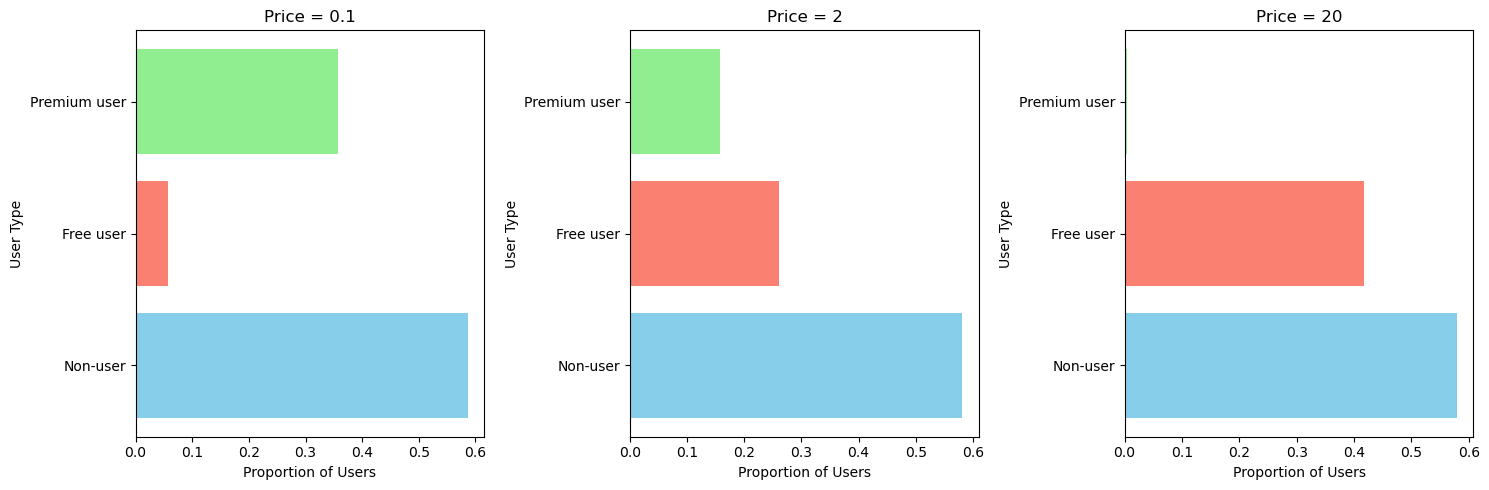

In [18]:

prices = [0.10, 2, 20]
months = 12


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, price in enumerate(prices):
    final_distribution = iterate(price, months)
    axs[i].barh(["Non-user", "Free user", "Premium user"], final_distribution, color=['skyblue', 'salmon', 'lightgreen'])
    axs[i].set_title(f"Price = {price}")
    axs[i].set_xlabel('Proportion of Users')
    axs[i].set_ylabel('User Type')

plt.tight_layout()
plt.show()

Which of the above prices yields the most premium users after one year? Is this surprising? Why or why not?

Prices 0.1 and 2.00 yield the most premium users after one year. This is not surprising, as an increase in price of being a premium user will most likely result in a decrease in demand for the subscription. Our transition matrices demonstrate that a matrix pertaining to a higher price will result in lower probabilities of becoming a premium user (assuming one was a non-user or free-user beforehand).